In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [4]:
df = pd.read_csv('raw_data.csv', index_col=0)

In [5]:
df.head()

,vmin,vmax,num_of_features,a_fitness,training_accuracy,test_accuracy
index,,,,,,
0,-6.0,-2.0,2,0.8457,0.8098,0.8183
1,-5.8,-1.8,2,0.8260,0.7851,0.7714
2,-5.6,-1.6,2,0.8338,0.7948,0.6667
3,-5.4,-1.4,2,0.8295,0.7895,0.7733
4,-5.2,-1.2,2,0.8376,0.7996,0.8117


In [11]:
df.tail()

,vmin,vmax,num_of_features,a_fitness,training_accuracy,test_accuracy
index,,,,,,
36,1.2,5.2,80,0.6885,0.7159,0.7367
37,1.4,5.4,78,0.6866,0.7108,0.7550
38,1.6,5.6,77,0.6798,0.7010,0.7914
39,1.8,5.8,76,0.6968,0.7211,0.7183
40,2.0,6.0,74,0.6989,0.7211,0.7183


In [10]:
df.iloc[:, 2:].describe()

,num_of_features,a_fitness,training_accuracy,test_accuracy
count,41.000000,41.000000,41.000000,41.000000
mean,39.439024,0.763205,0.755895,0.730315
std,36.397836,0.071454,0.042585,0.052640
min,2.000000,0.675000,0.696400,0.598300
25%,2.000000,0.693800,0.715900,0.696700
50%,45.000000,0.725400,0.740600,0.736700
75%,77.000000,0.833500,0.794800,0.768300
max,80.000000,0.857100,0.824000,0.818300


In [15]:
df['num_of_features'].value_counts()

2     16
78     6
77     4
76     2
73     1
3      1
5      1
6      1
71     1
72     1
57     1
74     1
45     1
79     1
80     1
17     1
75     1
Name: num_of_features, dtype: int64

(array([19.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  2., 17.]),
 array([ 2. ,  9.8, 17.6, 25.4, 33.2, 41. , 48.8, 56.6, 64.4, 72.2, 80. ]),
 <a list of 10 Patch objects>)

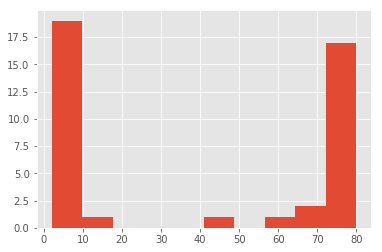

In [16]:
plt.hist(df['num_of_features'])

(array([10.,  9.,  2.,  0.,  0.,  0.,  0.,  1., 12.,  7.]),
 array([0.675  , 0.69321, 0.71142, 0.72963, 0.74784, 0.76605, 0.78426,
        0.80247, 0.82068, 0.83889, 0.8571 ]),
 <a list of 10 Patch objects>)

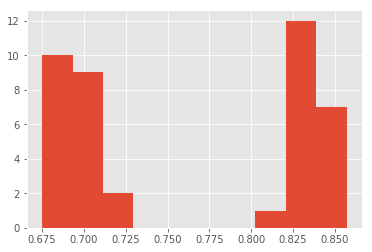

In [17]:
plt.hist(df['a_fitness'])

(array([ 4., 13.,  2.,  2.,  0.,  0.,  4.,  6.,  8.,  2.]),
 array([0.6964 , 0.70916, 0.72192, 0.73468, 0.74744, 0.7602 , 0.77296,
        0.78572, 0.79848, 0.81124, 0.824  ]),
 <a list of 10 Patch objects>)

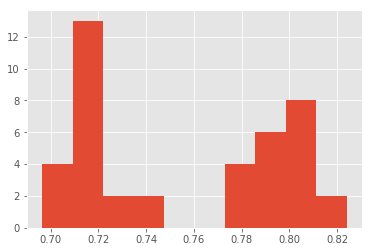

In [18]:
plt.hist(df['training_accuracy'])

(array([1., 2., 1., 5., 3., 5., 9., 9., 1., 5.]),
 array([0.5983, 0.6203, 0.6423, 0.6643, 0.6863, 0.7083, 0.7303, 0.7523,
        0.7743, 0.7963, 0.8183]),
 <a list of 10 Patch objects>)

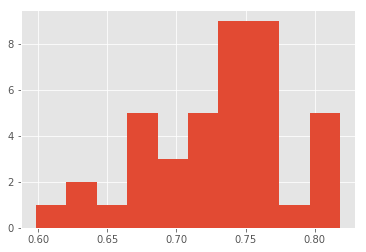

In [19]:
plt.hist(df['test_accuracy'])

Text(0,0.5,'Accuracy on TEST DATA')

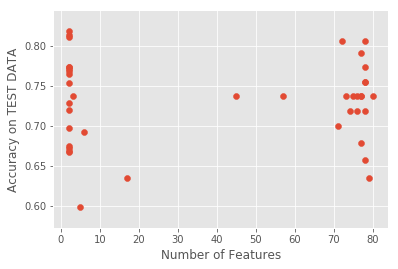

In [22]:
plt.scatter(df['num_of_features'], df['test_accuracy'])
plt.xlabel('Number of Features')
plt.ylabel('Accuracy on TEST DATA')

How very interesting. There appear to be two distinct groups, each covering a large range of accuracy. One is centered on a very low number of features, the other is centered on a pretty high number of features. There are two things that I don't understand here:

* Why there are two groups, centered at 2 and about 78
* what is causing the spread for the two groups individually

Text(0,0.5,'Accuracy on TEST DATA')

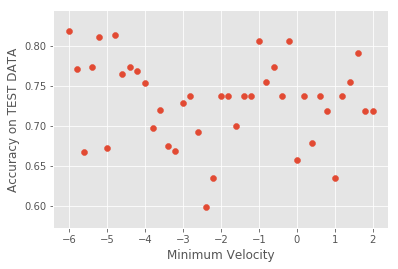

In [23]:
plt.scatter(df['vmin'], df['test_accuracy'])
plt.xlabel('Minimum Velocity')
plt.ylabel('Accuracy on TEST DATA')

Huh, there doesn't look like there Any correlation between Where the velocity clipping is and the final accuracy.

Text(0,0.5,'Accuracy on TRAINING DATA')

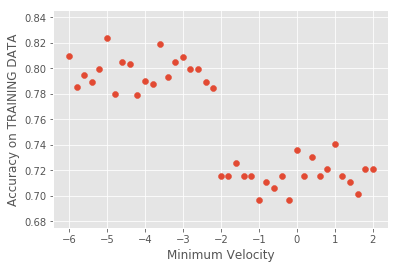

In [24]:
plt.scatter(df['vmin'], df['training_accuracy'])
plt.xlabel('Minimum Velocity')
plt.ylabel('Accuracy on TRAINING DATA')

Two distinct groups again. Fascinating, there is a perfect cutoff point at the range (-2, 2) for velocity where the accuracy on training data drops significantly. However, this is not the case for accuracy on test data.

Text(0,0.5,'Accuracy on TRAINING DATA')

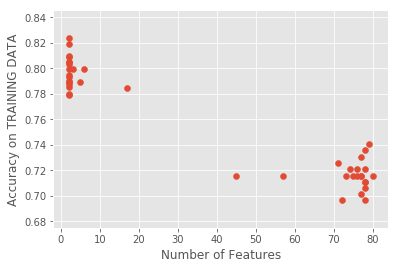

In [25]:
plt.scatter(df['num_of_features'], df['training_accuracy'])
plt.xlabel('Number of Features')
plt.ylabel('Accuracy on TRAINING DATA')

Text(0,0.5,'Number of Features')

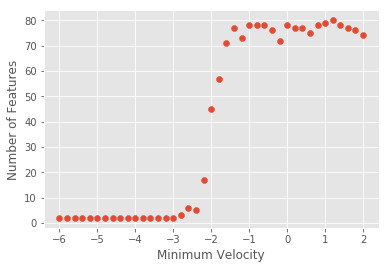

In [26]:
plt.scatter(df['vmin'], df['num_of_features'])
plt.xlabel('Minimum Velocity')
plt.ylabel('Number of Features')

THERE it is.

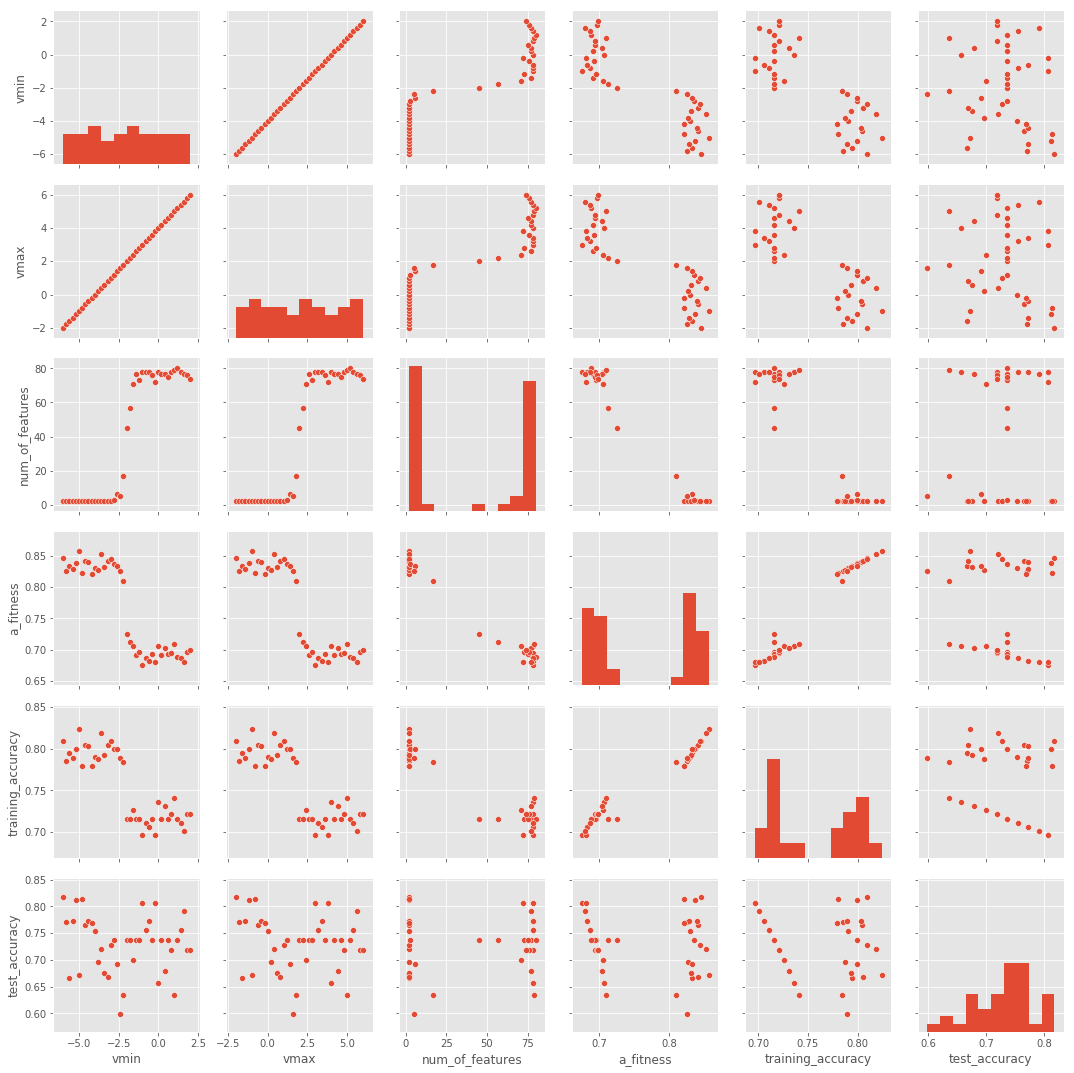

In [28]:
sns.pairplot(df)

The 2 linear plots are nothing, just vmin and vmax

The ones with two clear groups are interesting. I think the ones with stratified groups are a side effect of the ones with a sigmoid curve. I wonder if this is an artifact of the logistic function used in the COMB-PSO algorithm.

Disappointly, none of the variables produce any kind of helpful pattern in test_accuracy. 

In [29]:
df['overfitting'] = df['training_accuracy']-df['test_accuracy']

In [30]:
df.head()

,vmin,vmax,num_of_features,a_fitness,training_accuracy,test_accuracy,overfitting
index,,,,,,,
0,-6.0,-2.0,2,0.8457,0.8098,0.8183,-0.0085
1,-5.8,-1.8,2,0.8260,0.7851,0.7714,0.0137
2,-5.6,-1.6,2,0.8338,0.7948,0.6667,0.1281
3,-5.4,-1.4,2,0.8295,0.7895,0.7733,0.0162
4,-5.2,-1.2,2,0.8376,0.7996,0.8117,-0.0121


Text(0,0.5,'Difference training over test')

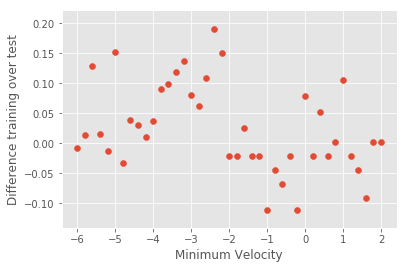

In [31]:
plt.scatter(df['vmin'], df['overfitting'])
plt.xlabel('Minimum Velocity')
plt.ylabel('Difference training over test')

It looks like with these other parameters, I need to choose a velocity minimum above -2.0